# User defined loss functions

Here we will show how you can define your own loss functions to train a neural network.

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

import easysurrogate as es

In [37]:
plt.rcParams['image.cmap'] = 'seismic'

We will use a very simple analytic function `f` to generate some training data

In [101]:
def f(x1, x2):
    """
    A simple analytic function.

    Parameters
    ----------
    x1 : float or array of floats
        First input.
    x2 : float or array of floats
        Second input.

    Returns
    -------
    float or array of floats
        Function values at (x1, x2).

    """
    return np.array([np.sin(x1 ** 2), np.cos(x2)])

Generate the training data

In [66]:
n_train = 10000
X = np.random.rand(n_train, 2)
y = f(X[:, 0], X[:, 1]).T
n_out = y.shape[1]

Here we train a standard ANN with the squared loss function (`loss="squared"`) for the i-th mini batch:

\begin{align}
L_i = ({\bf y}_i - {\bf h}_i)^2
\end{align}

Here, ${\bf y}_i$ and ${\bf h}_i$ are the data and the ANN prediction respectively, both of dimension `n_out x batch_size`, i.e. `2 x 32` in this case. Hence these are **elementwise** values of the loss. Internally, the following gradient is computed:

\begin{align}
\frac{\partial L_i}{\partial {\bf h}_i} = -2({\bf y}_i - {\bf h}_i)
\end{align}

This gradient is then used to propagate the loss backwards through the network, and should again be interpreted as an elementwise gradient for each value of the mini batch.

In [85]:
ANN = es.methods.ANN_Surrogate()
n_iter = 5000
ANN.train(X, y, n_iter,
          loss = 'squared',
          n_neurons = 100, n_layers = 3, 
          batch_size=32)

Creating ANN_Surrogate Object
Creating Feature Engineering object
Using  10000/10000 samples to train the ML model
Neural net parameters
Number of layers = 3
Number of features = 2
Loss function = squared
Number of neurons per hidden layer = 100
Number of output neurons = 2
Activation = ['linear', 'tanh', 'tanh', 'linear']
This neural network has 10602 weights.
Training Artificial Neural Network...


  0%|▋                                                                                                                                                                          | 19/5000 [00:00<00:26, 187.25it/s]

 loss = 1.1027


 23%|███████████████████████████████████████▌                                                                                                                                 | 1169/5000 [00:01<00:04, 916.79it/s]

 loss = 0.0002


 43%|█████████████████████████████████████████████████████████████████████████▍                                                                                               | 2173/5000 [00:02<00:02, 948.88it/s]

 loss = 0.0001


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 3097/5000 [00:03<00:01, 960.11it/s]

 loss = 0.0000


 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 4146/5000 [00:04<00:01, 833.59it/s]

 loss = 0.0008


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 893.26it/s]


Make predictions at training data

In [83]:
predictions = np.zeros([X.shape[0], n_out])
for i, x in enumerate(X):
    predictions[i] = ANN.predict(x)

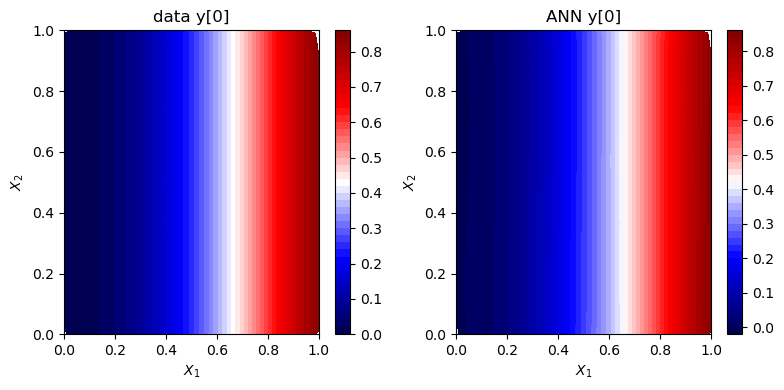

In [98]:
fig = plt.figure(figsize=[8,4])

ax = fig.add_subplot(121, xlabel=r'$X_1$', ylabel=r'$X_2$', title='data y[0]', xlim=[0,1], ylim=[0,1])
ct = ax.tricontourf(X[:, 0], X[:, 1], y[:, 0], 50)
plt.colorbar(ct)

ax = fig.add_subplot(122, xlabel=r'$X_1$', ylabel=r'$X_2$', title='ANN y[0]', xlim=[0,1], ylim=[0,1])
ct = ax.tricontourf(X[:, 0], X[:, 1], predictions[:, 0], 50)
plt.colorbar(ct)

plt.tight_layout()

### User defined loss

Now, let's say we wish to use the following loss instead, which is not implemented:

\begin{align}
L_i = |{\bf y}_i - {\bf h}_i|
\end{align}

We can define the loss function which returns $L_i = |{\bf y}_i - {\bf h}_i|$ and the gradient $\frac{\partial L_i}{\partial {\bf h}_i} = -\mathrm{sign}({\bf y}_i - {\bf h}_i)$. 

This function **needs to have the arguments `(h, y)`, in this order**.

In [90]:
def user_defined_loss(h, y):
    """
    User defined loss L_i = |y_i - h_i|.

    Parameters
    ----------
    h : array, shape (n_out, batch_size)
        The minibatch ANN prediction of y.
    y : array, shape (n_out, batch_size)
        The minibatch training data.

    Returns
    -------
    L_i : array, shape (n_out, batch_size)
        Elementwise loss function values.
    grad_L : array, shape (n_out, batch_size)
        Elementwise loss function gradient values.

    """

    loss = np.abs(y - h)
    dloss_dh = -np.sign(y -h)

    return loss, dloss_dh

We redefine the ANN, and just pass the user-defined loss function as `loss=user_defined_loss`

In [91]:
ANN = es.methods.ANN_Surrogate()

# number of mini batch iterations
n_iter = 5000

# train the ANN
ANN.train(X, y, n_iter,
          loss = user_defined_loss,
          n_neurons = 100, n_layers = 3, 
          batch_size=32)

Creating ANN_Surrogate Object
Creating Feature Engineering object
Using  10000/10000 samples to train the ML model
Neural net parameters
Number of layers = 3
Number of features = 2
Loss function = <function user_defined_loss at 0x7f6d8b8893a0>
Number of neurons per hidden layer = 100
Number of output neurons = 2
Activation = ['linear', 'tanh', 'tanh', 'linear']
This neural network has 10602 weights.
Training Artificial Neural Network...


  0%|▊                                                                                                                                                                          | 22/5000 [00:00<00:22, 218.81it/s]

 loss = 1.0530


 23%|██████████████████████████████████████▊                                                                                                                                  | 1149/5000 [00:01<00:04, 843.77it/s]

 loss = 0.0113


 43%|████████████████████████████████████████████████████████████████████████▏                                                                                                | 2136/5000 [00:02<00:02, 961.39it/s]

 loss = 0.0123


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 3133/5000 [00:03<00:01, 986.54it/s]

 loss = 0.0097


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 4130/5000 [00:04<00:00, 988.03it/s]

 loss = 0.0088


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:05<00:00, 914.72it/s]


Make predictions at training data

In [92]:
predictions = np.zeros([X.shape[0], n_out])
for i, x in enumerate(X):
    predictions[i] = ANN.predict(x)

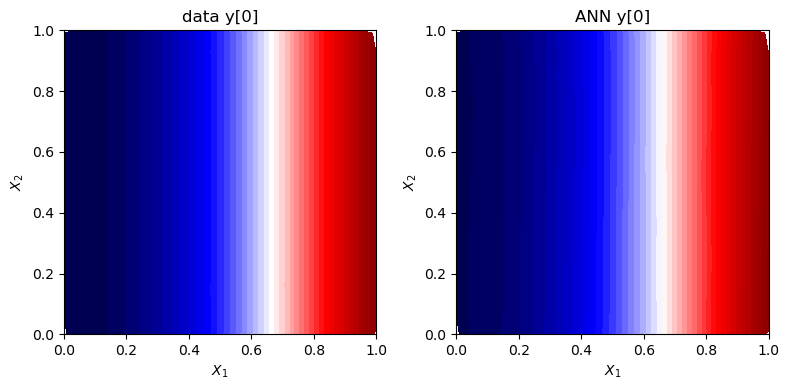

In [99]:
fig = plt.figure(figsize=[8,4])

ax = fig.add_subplot(121, xlabel=r'$X_1$', ylabel=r'$X_2$', title='data y[0]', xlim=[0,1], ylim=[0,1])
ax.tricontourf(X[:, 0], X[:, 1], y[:, 0], 50)

ax = fig.add_subplot(122, xlabel=r'$X_1$', ylabel=r'$X_2$', title='ANN y[0]', xlim=[0,1], ylim=[0,1])
ax.tricontourf(X[:, 0], X[:, 1], predictions[:, 0], 50)

plt.tight_layout()